# Importing libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing datasets

In [14]:
data = pd.read_csv(r'path\to\file.csv')

data.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


# Cancellations per Reason & Driver Assignment

,Reason,Driver Assignment,Cancellations
0,client,no driver,4496
1,client,driver assigned,2811
2,system,no driver,3406
3,system,driver assigned,3


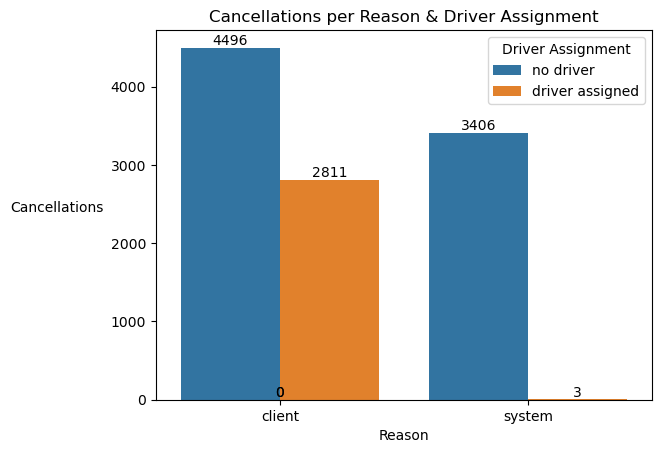

In [15]:
driver_cancellations = data.groupby(['order_status_key', 'is_driver_assigned_key'])['order_gk'].count().reset_index(name = 'Cancellations').rename(columns = {'order_status_key':'Reason', 'is_driver_assigned_key':'Driver Assignment'})
driver_cancellations['Reason'] = np.where(driver_cancellations['Reason'] == 4, 'client', 'system')
driver_cancellations['Driver Assignment'] = np.where(driver_cancellations['Driver Assignment'] == 1, 'driver assigned', 'no driver')

def add_labels(ax):
    for i in ax.patches:
        ax.text(
            i.get_x() + i.get_width() / 2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha = 'center',
            va = 'bottom',
            color = 'black'
        )

fig, ax = plt.subplots()
sns.barplot(x = 'Reason', y = 'Cancellations', hue = 'Driver Assignment', data = driver_cancellations)
add_labels(ax)

plt.title('Cancellations per Reason & Driver Assignment')
plt.xlabel('Reason')
plt.ylabel('Cancellations', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)
plt.legend(title = 'Driver Assignment')

display(driver_cancellations)
plt.show()

# Cancellations per Hour

,Hour,Cancellations,Percent
1,1,471,4.0
2,2,555,5.0
3,3,513,5.0
4,4,152,1.0
5,5,67,1.0
6,6,159,1.0
7,7,447,4.0
8,8,1082,10.0
9,9,412,4.0
10,10,170,2.0


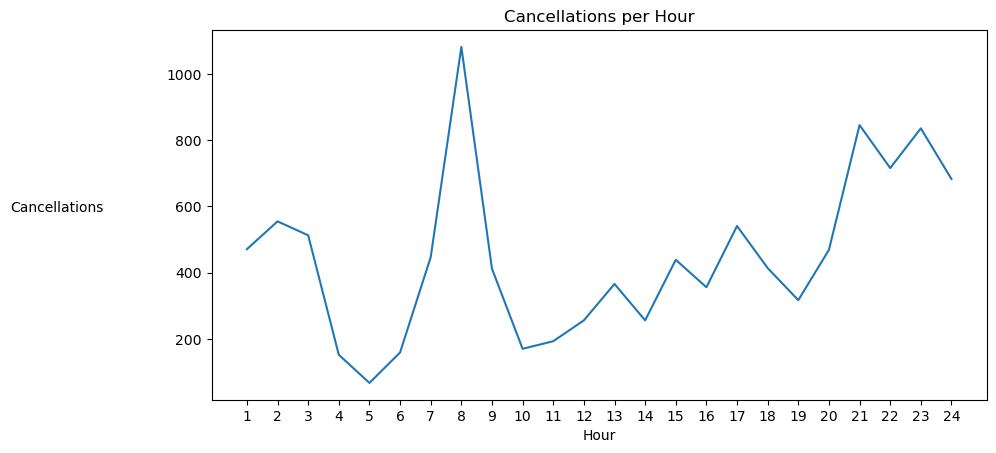

In [23]:
import warnings

cancellations_per_hour = data.groupby(pd.to_datetime(data['order_datetime']).dt.hour)['order_gk'].count().reset_index(name = 'Cancellations').rename(columns = {'order_datetime':'Hour'})
cancellations_per_hour['Percent'] = round(data.groupby(pd.to_datetime(data['order_datetime']).dt.hour)['order_gk'].count() / data['order_gk'].count() * 100)

cancellations_per_hour['Hour'] = np.where(cancellations_per_hour['Hour'] == 0, 24, cancellations_per_hour['Hour'])
cancellations_per_hour = cancellations_per_hour.sort_values('Hour')

fig, ax = plt.subplots(figsize = (10, 4.8))
plt.plot(cancellations_per_hour['Hour'], cancellations_per_hour['Cancellations'])
plt.title('Cancellations per Hour')
plt.xlabel('Hour')
plt.xticks(cancellations_per_hour['Hour'])
plt.ylabel('Cancellations', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)

warnings.filterwarnings('ignore')

display(cancellations_per_hour)
plt.show()

# Average Time to Cancellations (Seconds) per Hour & Driver Assignment

,Hour,Driver Assignment,Average Time to Cancellation (Seconds)
2,1,no driver,98.13
3,1,driver assigned,247.72
4,2,no driver,106.44
5,2,driver assigned,303.31
6,3,no driver,104.36
7,3,driver assigned,292.64
8,4,no driver,90.00
9,4,driver assigned,243.22
11,5,driver assigned,314.40
10,5,no driver,121.80


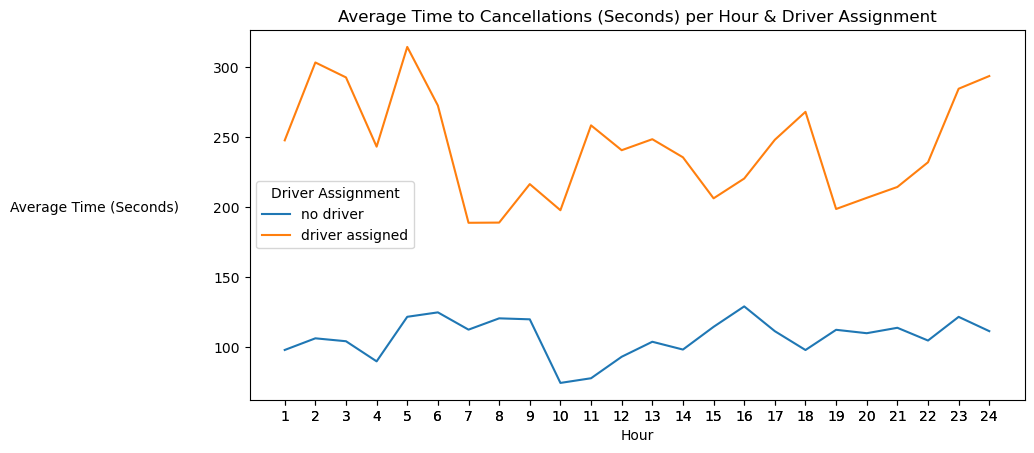

In [17]:
data['Hour'] = pd.to_datetime(data['order_datetime']).dt.hour
average_time_to_cancellations_driver = data.groupby(['Hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().round(2).reset_index(name = 'Average Time to Cancellation (Seconds)').rename(columns ={'is_driver_assigned_key':'Driver Assignment'})


average_time_to_cancellations_driver['Hour'] = np.where(average_time_to_cancellations_driver['Hour'] == 0, 24, average_time_to_cancellations_driver['Hour'])
average_time_to_cancellations_driver = average_time_to_cancellations_driver.sort_values('Hour')
average_time_to_cancellations_driver['Driver Assignment'] = np.where(average_time_to_cancellations_driver['Driver Assignment'] == 1, 'driver assigned', 'no driver')

    

fig, ax = plt.subplots(figsize = (10, 4.8))
sns.lineplot(x = 'Hour', y = 'Average Time to Cancellation (Seconds)', hue = 'Driver Assignment', data = average_time_to_cancellations_driver)
plt.title('Average Time to Cancellations (Seconds) per Hour & Driver Assignment')
plt.xlabel('Hour')
plt.xticks(average_time_to_cancellations_driver['Hour'])
plt.ylabel('Average Time (Seconds)', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)

display(average_time_to_cancellations_driver)
plt.show()

# Average Time to Cancellation (Seconds) per Hour & Reason

,Hour,Reason,Average Time to Cancellation (Seconds)
2,1,client,141.01
3,1,system,0.00
4,2,client,155.19
5,2,system,0.00
6,3,client,146.20
7,3,system,0.00
8,4,client,159.03
9,4,system,0.00
11,5,system,0.00
10,5,client,242.18


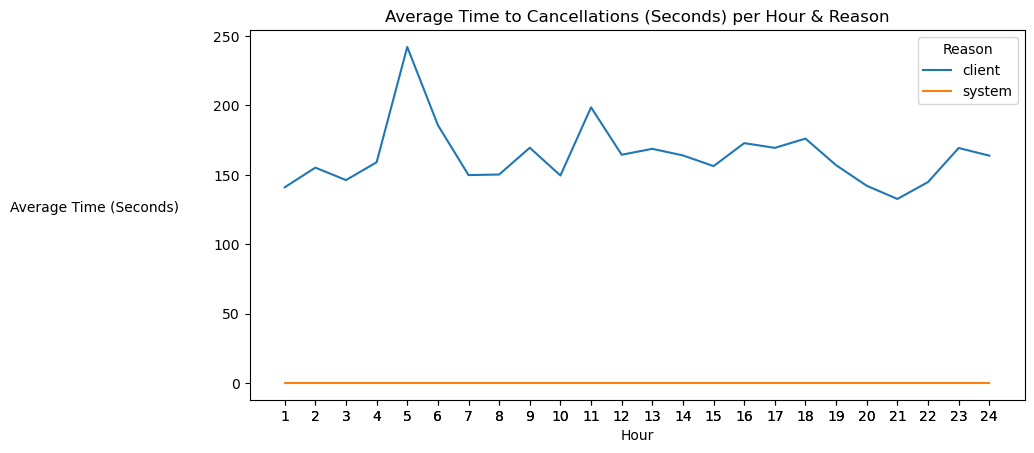

In [18]:
average_time_to_cancellations_client = data.groupby(['Hour', 'order_status_key'])['cancellations_time_in_seconds'].mean().round(2).reset_index(name = 'Average Time to Cancellation (Seconds)').rename(columns ={'order_status_key':'Reason'})

average_time_to_cancellations_client['Hour'] = np.where(average_time_to_cancellations_client['Hour'] == 0, 24, average_time_to_cancellations_client['Hour'])
average_time_to_cancellations_client = average_time_to_cancellations_client.sort_values('Hour')
average_time_to_cancellations_client['Reason'] = np.where(average_time_to_cancellations_client['Reason'] == 4, 'client', 'system')
average_time_to_cancellations_client['Average Time to Cancellation (Seconds)'] = np.where(average_time_to_cancellations_client['Average Time to Cancellation (Seconds)'].isna(), 0, average_time_to_cancellations_client['Average Time to Cancellation (Seconds)'])

fig, ax = plt.subplots(figsize = (10, 4.8))
sns.lineplot(x = 'Hour', y = 'Average Time to Cancellation (Seconds)', hue = 'Reason', data = average_time_to_cancellations_client)
plt.title('Average Time to Cancellations (Seconds) per Hour & Reason')
plt.xlabel('Hour')
plt.xticks(average_time_to_cancellations_client['Hour'])
plt.ylabel('Average Time (Seconds)', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)

display(average_time_to_cancellations_client)
plt.show()

# Average Time to Cancellations per Reason & Driver Assignment

,Reason,Driver Assignment,Average Time to Cancellation (Seconds)
0,client,no driver,110.37
1,client,driver assigned,233.90
2,system,no driver,0.00
3,system,driver assigned,0.00


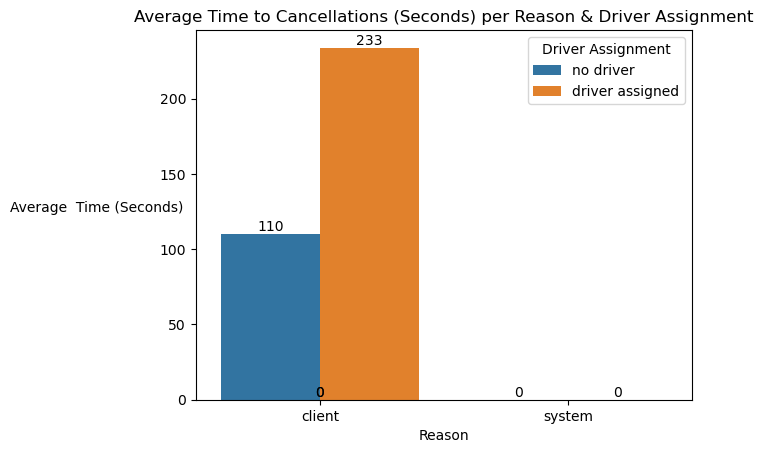

In [19]:
average_time_to_cancellations_client_driver = data.groupby(['order_status_key', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().round(2).reset_index(name = 'Average Time to Cancellation (Seconds)').rename(columns = {'order_status_key':'Reason', 'is_driver_assigned_key':'Driver Assignment'})
average_time_to_cancellations_client_driver['Reason'] = np.where(average_time_to_cancellations_client_driver['Reason'] == 4, 'client', 'system')
average_time_to_cancellations_client_driver['Driver Assignment'] = np.where(average_time_to_cancellations_client_driver['Driver Assignment'] == 1, 'driver assigned', 'no driver')
average_time_to_cancellations_client_driver['Average Time to Cancellation (Seconds)'] = np.where(average_time_to_cancellations_client_driver['Average Time to Cancellation (Seconds)'].isna(), 0, average_time_to_cancellations_client_driver['Average Time to Cancellation (Seconds)'])

def add_labels(ax):
    for i in ax.patches:
        ax.text(
            i.get_x() + i.get_width() / 2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha = 'center',
            va = 'bottom',
            color = 'black'
        )

fig, ax = plt.subplots()
sns.barplot(x = 'Reason', y = 'Average Time to Cancellation (Seconds)', hue = 'Driver Assignment', data = average_time_to_cancellations_client_driver)
add_labels(ax)
plt.title('Average Time to Cancellations (Seconds) per Reason & Driver Assignment')
plt.ylabel('Average  Time (Seconds)', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)

display(average_time_to_cancellations_client_driver)
plt.show()

# Average Order ETA per Hour

,Hour,Average Order ETA
1,1,324.75
2,2,391.01
3,3,388.09
4,4,299.66
5,5,411.12
6,6,427.15
7,7,583.36
8,8,636.91
9,9,504.89
10,10,355.56


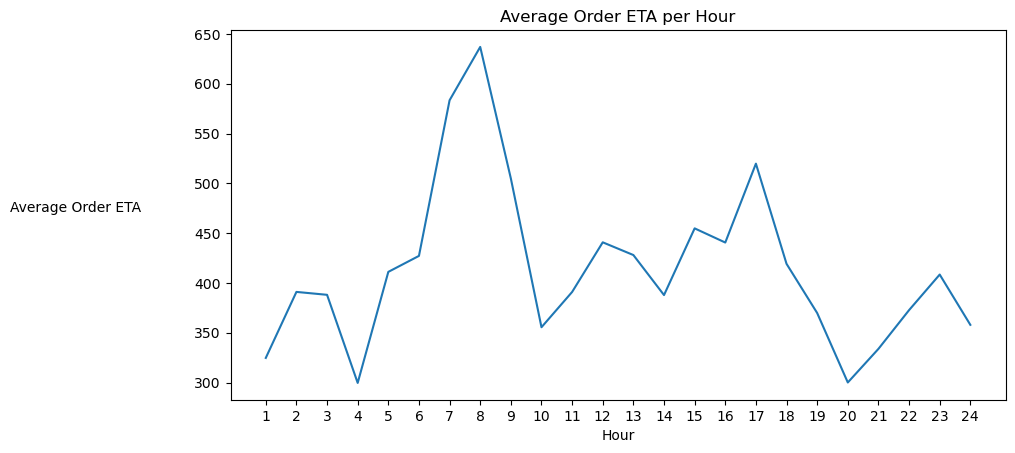

In [20]:
average_order_eta = data.groupby('Hour')['m_order_eta'].mean().round(2).reset_index(name = 'Average Order ETA')
average_order_eta['Hour'] = np.where(average_order_eta['Hour'] == 0, 24, average_order_eta['Hour'])
average_order_eta = average_order_eta.sort_values('Hour')

fig, ax = plt.subplots(figsize = (10, 4.8))
plt.plot('Hour', 'Average Order ETA', data = average_order_eta)
plt.title('Average Order ETA per Hour')
plt.xlabel('Hour')
plt.xticks(average_order_eta['Hour'])
plt.ylabel('Average Order ETA', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)


display(average_order_eta)
plt.show()

# Average Order ETA per Hour & Driver Assignment

,Hour,Driver Assignment,Average Order ETA
2,1,no driver,0.00
3,1,driver assigned,324.75
4,2,no driver,0.00
5,2,driver assigned,391.01
6,3,no driver,0.00
7,3,driver assigned,388.09
8,4,no driver,0.00
9,4,driver assigned,299.66
11,5,driver assigned,411.12
10,5,no driver,0.00


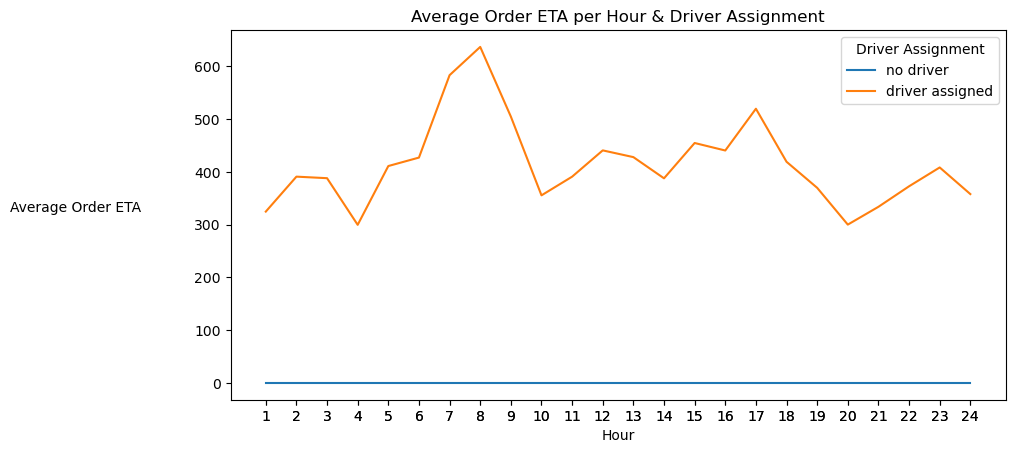

In [21]:
average_order_eta_per_driver_assignment = data.groupby(['Hour', 'is_driver_assigned_key'])['m_order_eta'].mean().round(2).reset_index(name = 'Average Order ETA').rename(columns = {'is_driver_assigned_key':'Driver Assignment'})
average_order_eta_per_driver_assignment['Hour'] = np.where(average_order_eta_per_driver_assignment['Hour'] == 0, 24, average_order_eta_per_driver_assignment['Hour'])
average_order_eta_per_driver_assignment = average_order_eta_per_driver_assignment.sort_values('Hour')
average_order_eta_per_driver_assignment['Average Order ETA'] = np.where(average_order_eta_per_driver_assignment['Average Order ETA'].isna(), 0, average_order_eta_per_driver_assignment['Average Order ETA'])
average_order_eta_per_driver_assignment['Driver Assignment'] = np.where(average_order_eta_per_driver_assignment['Driver Assignment'] == 1, 'driver assigned', 'no driver')

fig, ax = plt.subplots(figsize = (10, 4.8))
sns.lineplot(x = 'Hour', y = 'Average Order ETA', hue = 'Driver Assignment', data = average_order_eta_per_driver_assignment)
plt.title('Average Order ETA per Hour & Driver Assignment')
plt.xlabel('Hour')
plt.xticks(average_order_eta_per_driver_assignment['Hour'])
plt.ylabel('Average Order ETA', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)

display(average_order_eta_per_driver_assignment)
plt.show()

# Average Order ETA per Hour & Reason

,Hour,Reason,Average Order ETA
2,1,client,324.75
3,1,system,0.00
4,2,client,391.01
5,2,system,0.00
6,3,client,388.09
7,3,system,0.00
8,4,client,299.66
9,4,system,0.00
11,5,system,0.00
10,5,client,411.12


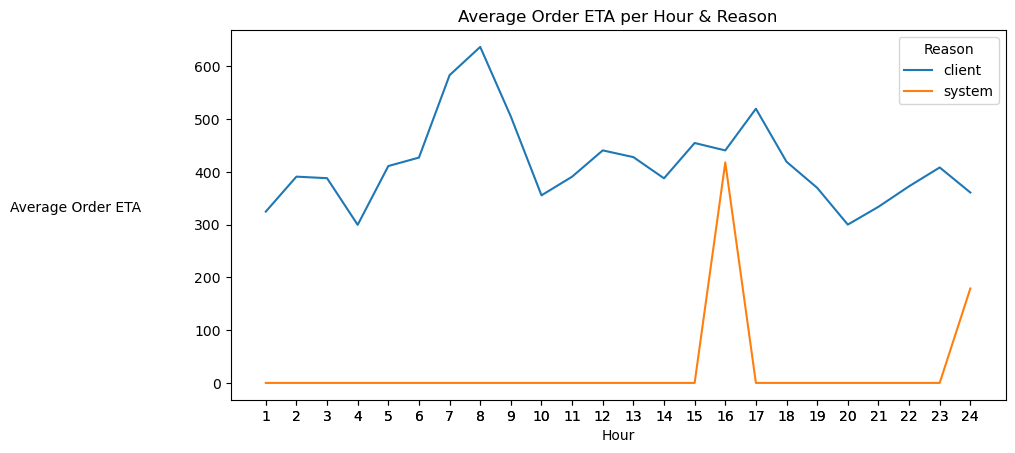

In [22]:
average_order_eta_per_client_status = data.groupby(['Hour', 'order_status_key'])['m_order_eta'].mean().round(2).reset_index(name = 'Average Order ETA').rename(columns = {'order_status_key':'Reason'})
average_order_eta_per_client_status['Hour'] = np.where(average_order_eta_per_client_status['Hour'] == 0, 24, average_order_eta_per_client_status['Hour'])
average_order_eta_per_client_status = average_order_eta_per_client_status.sort_values('Hour')
average_order_eta_per_client_status['Average Order ETA'] = np.where(average_order_eta_per_client_status['Average Order ETA'].isna(), 0, average_order_eta_per_client_status['Average Order ETA'])
average_order_eta_per_client_status['Reason'] = np.where(average_order_eta_per_client_status['Reason'] == 4, 'client', 'system')
fig, ax = plt.subplots(figsize = (10, 4.8))

sns.lineplot(x = 'Hour', y = 'Average Order ETA', hue = 'Reason', data = average_order_eta_per_client_status)
plt.title('Average Order ETA per Hour & Reason')
plt.xlabel('Hour')
plt.xticks(average_order_eta_per_client_status['Hour'])
plt.ylabel('Average Order ETA', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)

display(average_order_eta_per_client_status)
plt.show()